In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load CSV file into the df
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# EDA
crypto_df.shape

(1252, 7)

In [4]:
# Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Drop the IsTrading column
crypto_df = crypto_df.drop(columns ='IsTrading')
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Check for any null values
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
# Remove the rows with null values
crypto_df = crypto_df.dropna()

In [8]:
# Verify nulls are dropped
crypto_df.isnull().sum()
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Save CoinName column for t-SNE
CoinName=pd.DataFrame(crypto_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [11]:
# Since the coin names do not contribute to the analysis of the data, 
# delete the CoinName from the dataframe.
crypto_df.drop(columns='CoinName', axis=1, inplace= True)
crypto_df

/Users/shannonkane/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Drop Unamed:0 columns
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [13]:
# convert Algorithm and ProofType into numerical data
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# View column names 
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [15]:
# Standarize dataset; total coins mined and supplied have the big numbers
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [16]:
# Number of features in datast
len(X.columns)

98

In [17]:
## Applying PCA to reduce dimensions from 98 to 4
# Initialize model 
pca = PCA(n_components=0.9)

# Get three principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)


In [18]:
# Transform PCA data to a DF
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.984956e-12,-5.587163e-15,-4.070858e-16,-0.007129,-1.319756,-0.051813,...,-2.470702e-15,1.891693e-15,-5.539121e-15,-1.279294e-15,-1.078497e-15,-3.351254e-15,3.226812e-15,9.572342e-16,-2.114694e-15,8.762218e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.960484e-12,-5.826890e-15,-4.050436e-16,-0.007739,-1.322514,-0.056674,...,-2.751444e-15,1.650072e-15,-5.142541e-15,-7.870911e-16,-6.950084e-16,-3.692322e-15,3.801505e-15,2.285337e-15,-1.731003e-15,8.828233e-16
2,2.305468,1.656383,-0.683617,0.004731,1.016664e-11,-5.720923e-15,7.053242e-15,-0.054781,-1.542879,-0.943951,...,1.836982e-14,-1.610794e-14,4.401464e-14,9.704872e-15,-2.412961e-14,7.415236e-14,-7.963189e-14,-3.510378e-14,1.064824e-13,-6.609163e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.640153e-12,2.427808e-15,-1.548256e-15,-0.002071,0.281463,0.251862,...,2.149155e-15,4.212773e-15,-2.388025e-17,-6.512118e-15,-3.653415e-15,6.466600e-15,-9.028861e-15,4.033250e-15,1.681151e-14,-9.086748e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.658854e-12,-8.999548e-16,-1.106936e-15,0.027735,0.519099,0.188820,...,8.462173e-14,1.200669e-14,-4.413189e-14,1.435070e-14,1.071627e-14,-3.707038e-14,-3.236237e-14,-4.319863e-14,1.135017e-13,-1.393439e-13


In [19]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [20]:
# Preserve 90% of the explained variance in dimensionality reduction using PCA
pca2 = PCA(n_components=.90)

# Get three principal components for the crypto data.
crypto_pca = pca2.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.57234205e-16, -2.11469414e-15,  8.76221761e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         2.28533713e-15, -1.73100279e-15,  8.82823293e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -3.51037842e-14,  1.06482358e-13, -6.60916271e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         9.98793284e-15,  5.10697505e-14, -1.02007349e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.90049046e-15, -2.42369869e-15,  9.92265708e-17],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         6.51071425e-16, -1.57133933e-15,  3.65596727e-15]])

In [21]:
# initialize t-sne model
tsne = TSNE(learning_rate=250)

In [23]:
# Reduce dimensions and check that dimensions have been reduced to two
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

In [24]:
# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

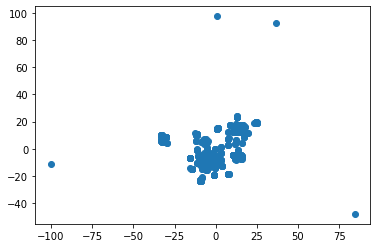

In [25]:
# Plot the results
plt.scatter(x, y)
plt.show()

In [26]:
# Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not. Use Colors here.
# Check class value counts
k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df

,0,1
0,10.414070,12.733421
1,16.672056,16.978956
2,23.573086,19.001842
3,-33.199646,5.790041
4,-15.359541,-7.154668
...,...,...
527,-29.740473,4.397364
528,16.433289,13.373184
529,-9.550208,-23.293964
530,-14.650849,-14.942925


In [27]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(k_means_df)

# Predict clusters
predictions = model.predict(k_means_df)

# Create return DataFrame with predicted clusters
k_means_df["class"] = model.labels_
k_means_df.head()

,0,1,class
0,10.414070,12.733421,1
1,16.672056,16.978956,1
2,23.573086,19.001842,1
3,-33.199646,5.790041,3
4,-15.359541,-7.154668,0


In [28]:
# Check class value counts
k_means_df['class'].value_counts()

0    234
1    140
2    108
3     50
Name: class, dtype: int64

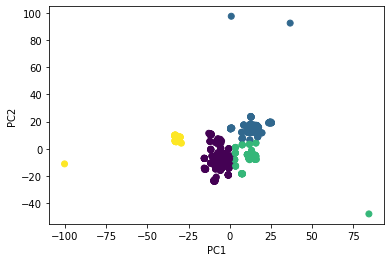

In [29]:
# Visualize the clusters
plt.scatter(k_means_df[0], k_means_df[1], c=k_means_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

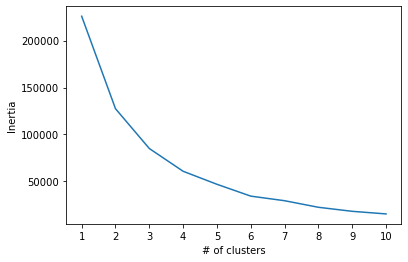

In [30]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
# Recommendation
# Based on the above, we can group the cryptocurrencies into 4 groups. However I don't think there is enough data to fully trust the results of machine learning.